In [1]:
# For data processing, management, and file reading
import pandas as pd
# For statistical analyses
import numpy

In [2]:
# Visualizing the data through plots
import matplotlib.pyplot as plt
# Making them pretty
import seaborn as sns
%matplotlib inline

Gaming has had an upsurge of popularity in the last couple years, where not only do people make livelihoods making them, but also playing them. This can range from casual Let's Plays to competitive e-sports games, but what types of games are the most popular to everyone? 

There was a deep seeded desire in me to learn what that answer was for the PS4, as I just recently bought it and was very indecisive in buying my next game. What better way to find out than to use data to come to my conclusions? I extracted the data from VGChartz.com to learn more.

In [3]:
# Reading file as a dataframe
df = pd.read_csv("PS4_VGChartz.csv", encoding = "ISO-8859-1")

In [4]:
# Keys of the dataframe
df.keys()

Index(['Game', 'Platform', 'Year', 'Genre', 'Publisher', 'North America',
       'Europe', 'Japan', 'Rest of World'],
      dtype='object')

In [5]:
# Renamed a couple keys so I don't have to worry about spaces
df = df.rename(columns={'North America': 'NA', 'Rest of World': 'Rest_of_World'})

In [6]:
# Snapshot of the dataframe
df.head()

,Game,Platform,Year,Genre,Publisher,NA,Europe,Japan,Rest_of_World
0,Grand Theft Auto V,PS4,2014.0,Action,Take-Two Interactive,4.59,7.71,0.48,2.35
1,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,Activision,5.97,6.07,0.37,2.40
2,FIFA 17,PS4,2016.0,Sports,Electronic Arts,1.15,7.88,0.11,1.58
3,Uncharted 4: A Thief's End,PS4,2016.0,Shooter,Sony Computer Entertainment,3.88,3.39,0.20,1.47
4,FIFA 16,PS4,2015.0,Sports,Electronic Arts,1.14,6.14,0.07,1.28


In [7]:
# A breakdown of what type of data I have on hand
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 876 entries, 0 to 875
Data columns (total 9 columns):
Game             875 non-null object
Platform         876 non-null object
Year             685 non-null float64
Genre            875 non-null object
Publisher        684 non-null object
NA               876 non-null float64
Europe           876 non-null float64
Japan            876 non-null float64
Rest_of_World    876 non-null float64
dtypes: float64(5), object(4)
memory usage: 61.7+ KB


Gameplay is very important aspect to my enjoyability. I enjoy a lot of JRPG's, but that doesn't mean I don't like the occasional Call of Duty now and then. Within my dataset, I found that there was regional and genre data that I could manipulate, so I decided to focus on the total number of sales versus genre by each region provided.

An important note to this data is that Japan is singled out by itself in all of Asia, and is alongside North America and Europe. I'm not exactly sure why this is, whether its lack of data coverage for all of Asia or because Japan is its own special case. 

In [8]:
# Grouped the values by region, and created another dataframe for it. Also added a new column for all the sales made globally

# Regional Grouping
NA_Genre_Total = df.groupby('Genre')['NA'].sum()
Europe_Genre_Total = df.groupby('Genre')['Europe'].sum()
Japan_Genre_Total = df.groupby('Genre')['Japan'].sum()
ROW_Genre_Total = df.groupby('Genre')['Rest_of_World'].sum()

Sales_By_Region = pd.concat([NA_Genre_Total, Europe_Genre_Total, Japan_Genre_Total,ROW_Genre_Total], axis=1)

# Adding the total numbers
Global_Genre_Total = Sales_By_Region.sum(axis=1)
Global_Genre_Total.name = 'Global_Total'

# Final data frame
Total_Genre_Sales = pd.concat([Sales_By_Region, Global_Genre_Total], axis=1)

Here we have the total amount of sales per genre for each region, as well as a total worldwide.

In [9]:
Total_Genre_Sales

,NA,Europe,Japan,Rest_of_World,Global_Total
Genre,,,,,
Action,39.79,52.12,8.47,17.89,118.27
Adventure,2.71,3.53,0.65,1.21,8.10
Fighting,4.09,3.27,1.00,1.49,9.85
Misc,3.96,3.97,0.73,1.59,10.25
Platform,2.97,4.03,0.52,1.34,8.86
Puzzle,0.03,0.03,0.00,0.02,0.08
Racing,3.04,8.01,0.34,2.02,13.41
Role-Playing,13.19,15.40,5.73,5.61,39.93
Shooter,39.16,45.44,3.34,16.50,104.44


I have plotted the number of sales made per genre with a bar chart below.

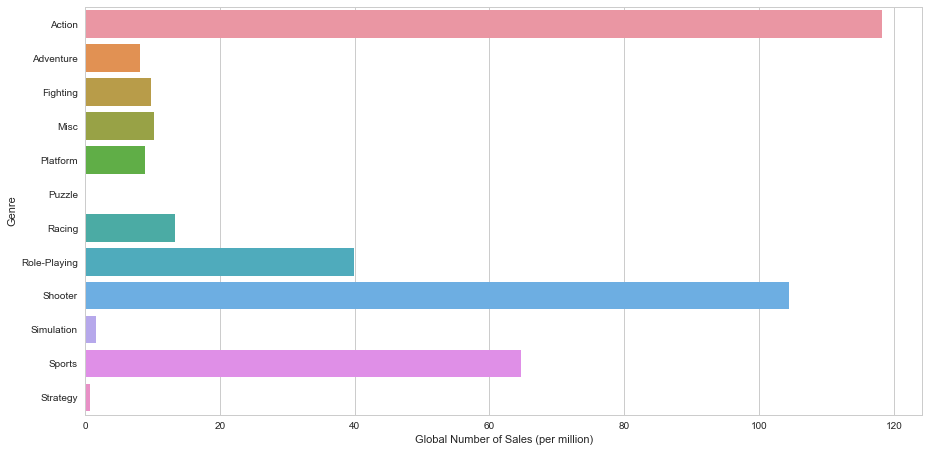

In [215]:
# I plotted the total number of sales made through seaborn, came out pretty nice and colorful
plt.figure(figsize = (15,7.5))
Genre_Plot = sns.barplot(x = Total_Genre_Sales.Global_Total.values, y = Total_Genre_Sales.Global_Total.index, orient = 'h')
Genre_Plot.set(xlabel='Global Number of Sales (per million)', ylabel='Genre')
plt.show()

Based off this plot, the 'Action' genre does exceedingly well. It makes sense, its defined as "genre that emphasizes physical challenges, including hand–eye coordination and reaction-time," (the wikipedia article on Action games) which can encompass a lot of these genres shown below. 

'Shooter' and 'Sports' follows in 2nd and 3rd place respectively, two highly competitive gaming genres that emphasize multiplayer. However, it was interesting to see 'Role-Playing' come in at a distant 4th in terms of sales. Most RPG's (Role-Playing Games), if not all, are single-player games that don't require additional controllers, good wi-fi, or other people. However, 39.93 million PS4 Role-Playing games were sold in the PS4's lifespan, which means around 40 million people didn't mind playing with themselves .  

I wanted to hone in on RPG data specifically, so I created a database specifically for them.

In [13]:
RPG_Database = df[df['Genre'] == 'Role-Playing']

In [15]:
RPG_Database.head()

,Game,Platform,Year,Genre,Publisher,NA,Europe,Japan,Rest_of_World
7,Fallout 4,PS4,2015.0,Role-Playing,Bethesda Softworks,2.64,3.49,0.25,1.20
15,Final Fantasy XV,PS4,2016.0,Role-Playing,Square Enix,1.39,1.61,0.96,0.59
16,The Witcher 3: Wild Hunt,PS4,2015.0,Role-Playing,Namco Bandai Games,1.12,2.30,0.25,0.64
45,The Elder Scrolls V: Skyrim,PS4,2016.0,Role-Playing,Bethesda Softworks,0.92,1.02,0.07,0.38
51,Diablo III,PS4,2014.0,Role-Playing,Activision,0.58,1.08,0.08,0.32


There are a lot of different publishers in this genre, how many games have they each published? 

In [163]:
# Create dataframe to collect games per game data
Number_of_Games = RPG_Database.groupby(['Publisher'], as_index=False).count()
Games_Per_Publisher = pd.concat([Games_Grouped['Publisher'], Games_Grouped['Game']], axis=1, keys=['Publisher', 'Number_of_Games'])

In [164]:
Games_Per_Publisher.head()

,Publisher,Number_of_Games
0,505 Games,2
1,Activision,1
2,Aksys Games,1
3,Atlus,1
4,Bethesda Softworks,3


Now that we have this data, lets combine it with their number of sales and see if there's a correlation between the number of games and the amount of sales made worldwide.

In [190]:
# Find the total amount by each region and then collect the global sales by summing them
NA_RPG_Publishers = RPG_Database.groupby('Publisher')['NA'].sum().sort_values(ascending=False)
Europe_RPG_Publishers = RPG_Database.groupby('Publisher')['Europe'].sum().sort_values(ascending=False)
Japan_RPG_Publishers = RPG_Database.groupby('Publisher')['Japan'].sum().sort_values(ascending=False)
ROW_RPG_Publishers = RPG_Database.groupby('Publisher')['Rest_of_World'].sum().sort_values(ascending=False)

RPG_Regional_Publishers = pd.concat([NA_RPG_Publishers, Europe_RPG_Publishers, Japan_RPG_Publishers, ROW_RPG_Publishers], axis=1)

# Adding the total numbers
Global_RPG_Publishers = RPG_Regional_Publishers.sum(axis=1)
Global_RPG_Publishers.name = 'Global_Total'

# Final data frame
#Total_RPG_Publishers = pd.concat([RPG_Regional_Publishers, Global_RPG_Publishers], axis=1)

In [191]:
# Finessing this as a dataframe further
Global_RPG_Publishers = pd.DataFrame(Global_RPG_Publishers)
Global_RPG_Publishers = Global_RPG_Publishers.reset_index()
Global_RPG_Publishers = Global_RPG_Publishers.rename(columns={'index': 'Publisher'})

In [192]:
Global_RPG_Publishers.head()

,Publisher,Global_Total
0,505 Games,0.00
1,Activision,2.06
2,Aksys Games,0.04
3,Atlus,0.40
4,Bethesda Softworks,11.79


In [194]:
# Merging the dataframes based on the publisher
Publishers_Games = pd.merge(Global_RPG_Publishers, Games_Per_Publisher, how='inner', on=['Publisher'])

Here is the final table of our data set of publishers, the number of games they have published, and the global sales they have made on those games.

In [214]:
Publishers_Games

,Publisher,Global_Total,Number_of_Games
0,505 Games,0.00,2
1,Activision,2.06,1
2,Aksys Games,0.04,1
3,Atlus,0.40,1
4,Bethesda Softworks,11.79,3
5,CD Projekt Red Studio,0.00,1
6,Capcom,0.09,3
7,Compile Heart,0.02,1
8,Deep Silver,0.19,3
9,Disney Interactive Studios,0.00,1


Below we have a heatmap representation of the table above. The Y axis gives us the publishers while the X axis gives us the number of games they have published. The intensity (hue) of the heatmap is the number of sales made; A lighter color represents a low amount of sales while a darker color represents a high amount of sales.

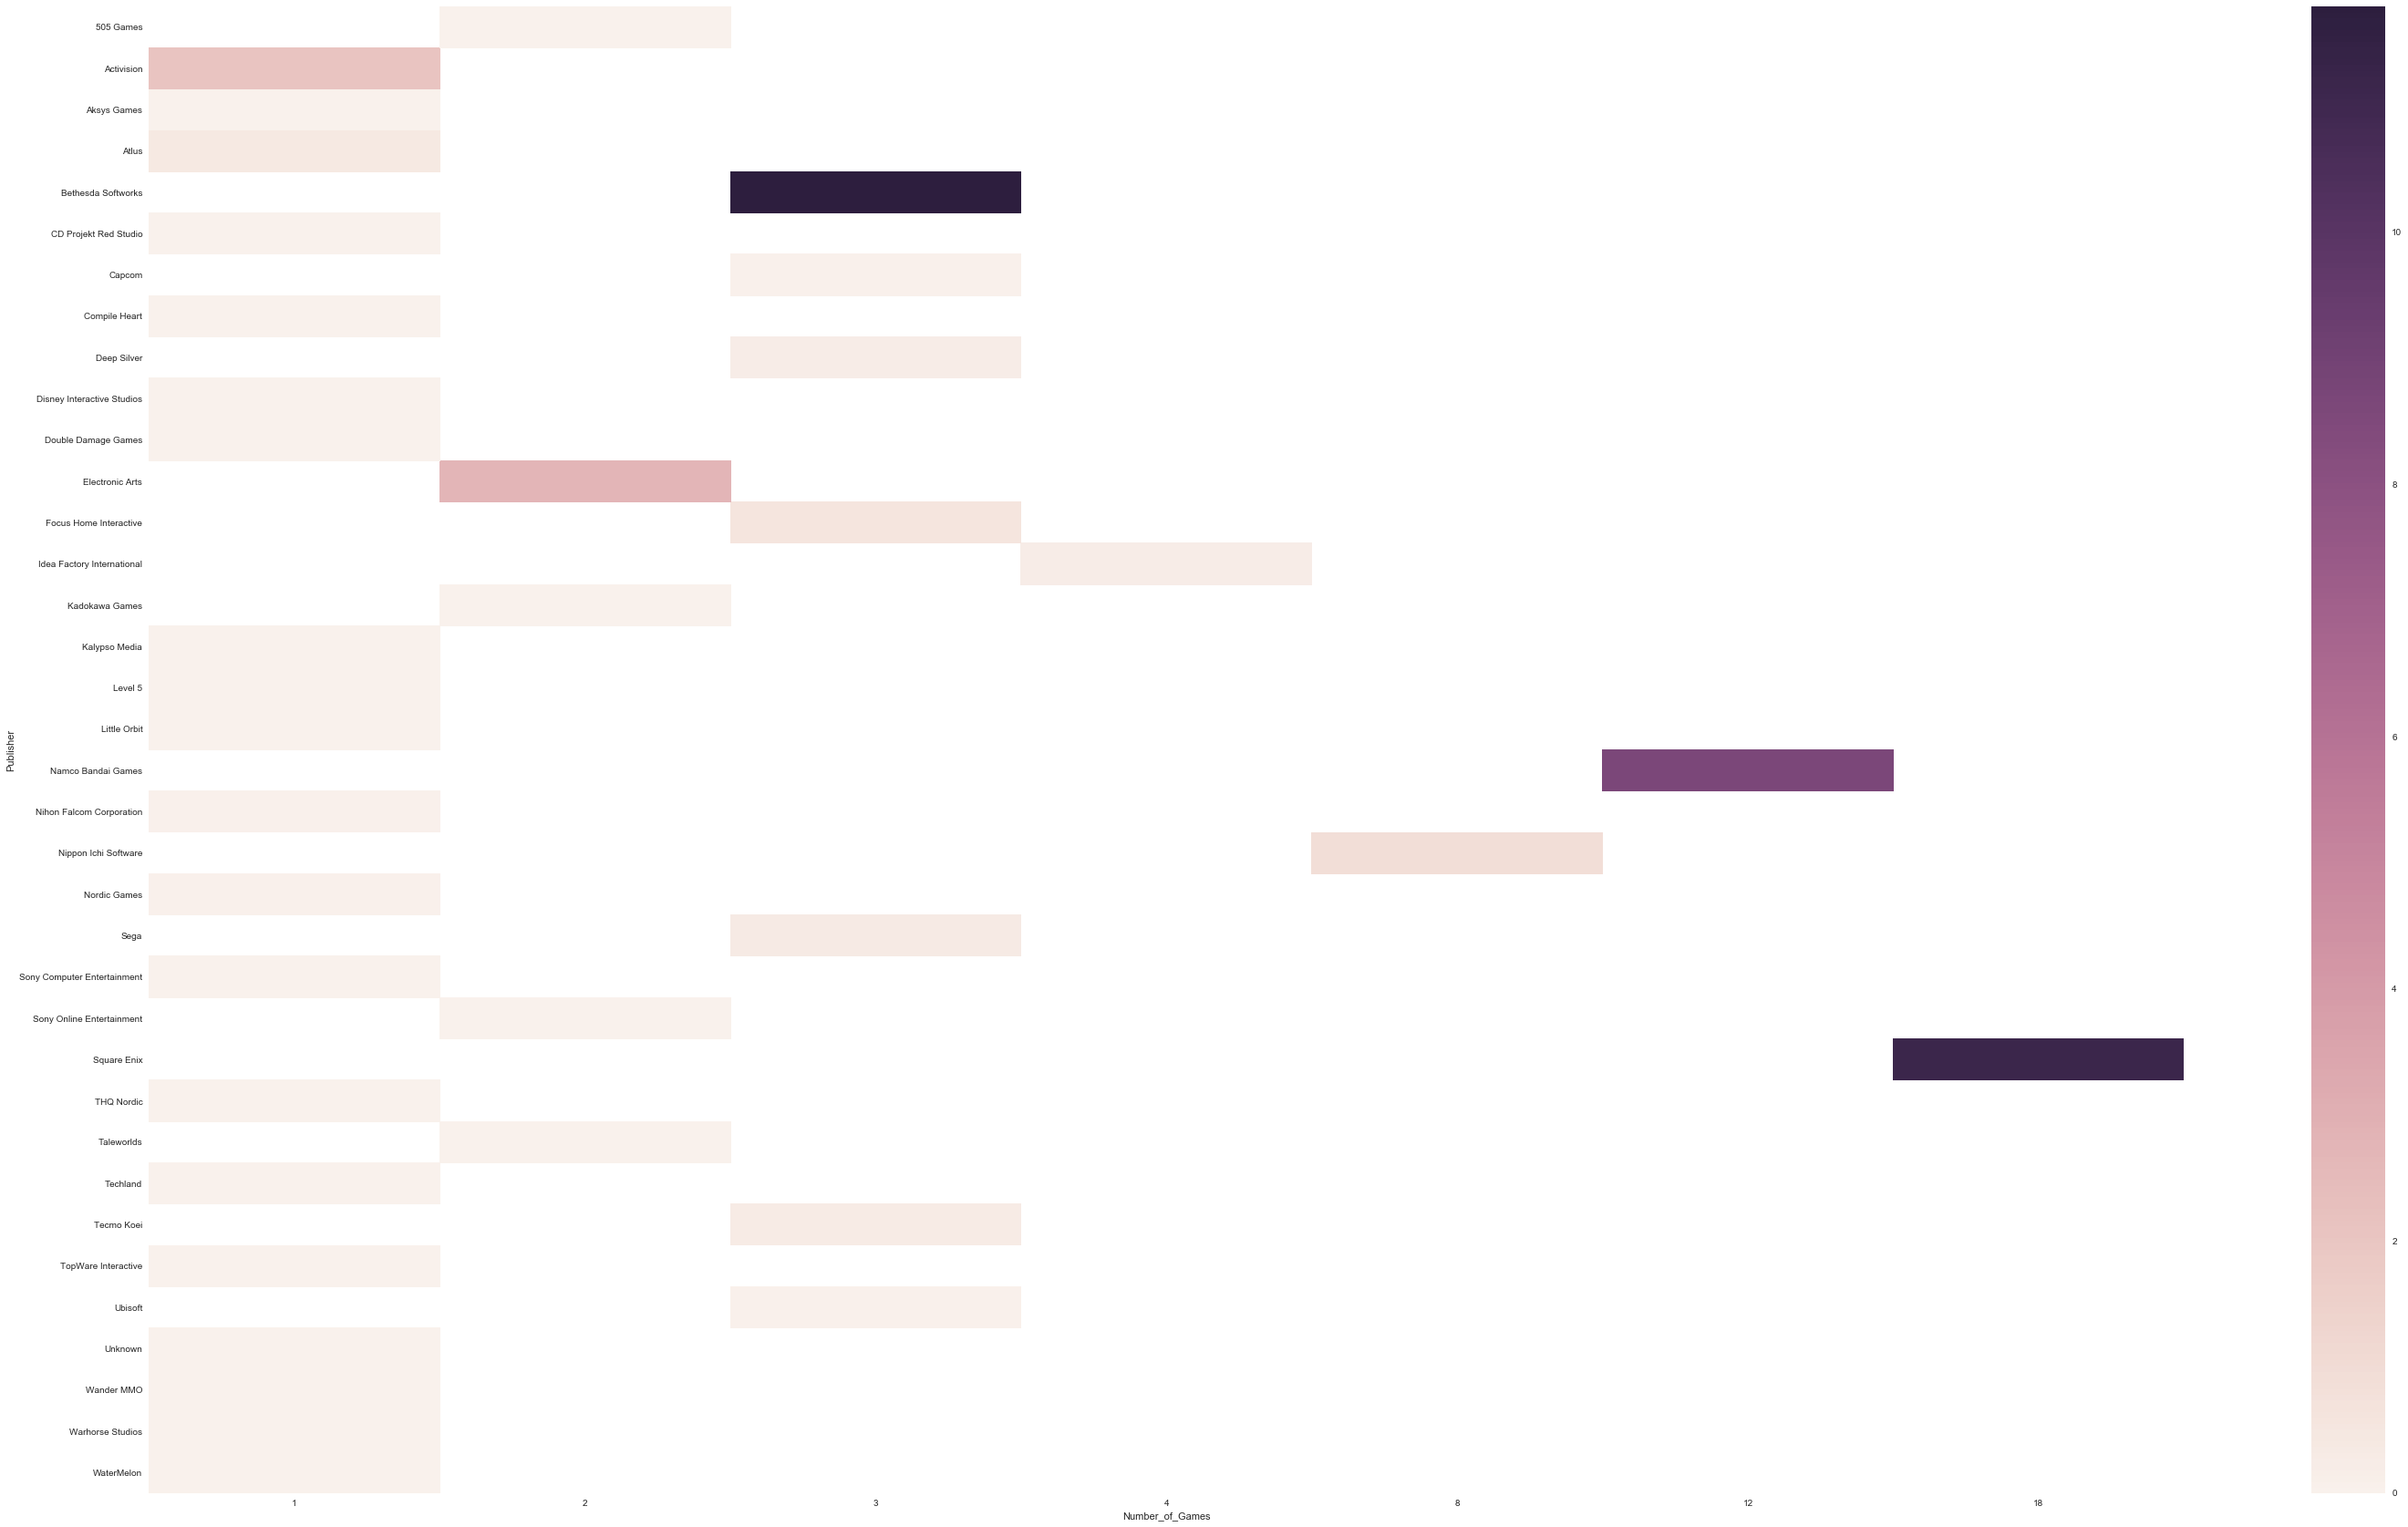

In [219]:
result = Publishers_Games.pivot(index='Publisher', columns='Number_of_Games', values='Global_Total')
plt.figure(figsize = (50,30))
sns.set(style="whitegrid")
sns.heatmap(result)
plt.show()